<a href="https://colab.research.google.com/github/GioMax102/Candidates_CV/blob/main/entrenarYolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/proyecto_2.zip" -d /content/dataset

Archive:  /content/proyecto_2.zip
   creating: /content/dataset/proyecto_2/
  inflating: /content/dataset/proyecto_2/classes.txt  
  inflating: /content/dataset/proyecto_2/notes.json  
   creating: /content/dataset/proyecto_2/labels/
   creating: /content/dataset/proyecto_2/labels/train/
  inflating: /content/dataset/proyecto_2/labels/train/04666964-01337.txt  
  inflating: /content/dataset/proyecto_2/labels/train/38f239cd-01262.txt  
  inflating: /content/dataset/proyecto_2/labels/train/da4e766b-01363.txt  
  inflating: /content/dataset/proyecto_2/labels/train/91c53241-01349.txt  
  inflating: /content/dataset/proyecto_2/labels/train/dc8bfa33-01259.txt  
  inflating: /content/dataset/proyecto_2/labels/train/2734a03c-00939.txt  
  inflating: /content/dataset/proyecto_2/labels/train/b8687f30-00053.txt  
  inflating: /content/dataset/proyecto_2/labels/train/7a7c1c25-01305.txt  
  inflating: /content/dataset/proyecto_2/labels/train/d679bf0b-00979.txt  
  inflating: /content/dataset/proyec

In [ ]:
import yaml

data = {
    'path': '/content/dataset/proyecto_2',
    'train': 'images/train',
    'val': 'images/val',
    'names': {
      0: 'Barrita',
      1: 'Medicina',
      2: 'Rexona',
      3: 'Dove',
      4: 'Gansito',
      5: 'Jumex',
      6: 'Minirin',
      7: 'Ole',
      8: 'Pinguinos',
      9: 'Plupez',
    }
}
with open('/content/dataset/proyecto_2/data.yaml', 'w') as f:
    yaml.dump(data, f,
              default_flow_style=False,
              sort_keys=False)


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11n-seg.pt')

results = model.train(
    data="/content/dataset/proyecto_2/data.yaml",
    epochs=70,
    imgsz=640,
    plots=True,

    hsv_h=0.015,    # Tono
    hsv_s=0.7,      # Saturación
    hsv_v=0.4,      # Brillo

    degrees=15.0,   # Rotación
    translate=0.1,  # Traslación
    scale=0.5,      # Escala
    shear=5.0,      # Cilladura

    perspective=0.0005,
    fliplr=0.0,

    mosaic=1,         # Mosaico, colage
    mixup=0.1,          # MixUp, transponer
    cutmix=0.1,         # CutMix

    erasing=0.3,        # Borrado

    rect=False,         # Entrenamiento rectangular (640x640)
    single_cls=False,   # Para todas las clases
)

Ultralytics 8.3.216 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.1, data=/content/dataset/proyecto_2/data.yaml, degrees=15.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.3, exist_ok=False, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0005, pl

In [ ]:
model = YOLO('/content/runs/segment/train2/weights/best.pt')


image 1/1 /content/prueba4.jpg: 480x640 1 Barrita, 1 Medicina, 2 Rexonas, 2 Doves, 1 Gansito, 1 Minirin, 75.5ms
Speed: 2.6ms preprocess, 75.5ms inference, 17.9ms postprocess per image at shape (1, 3, 480, 640)


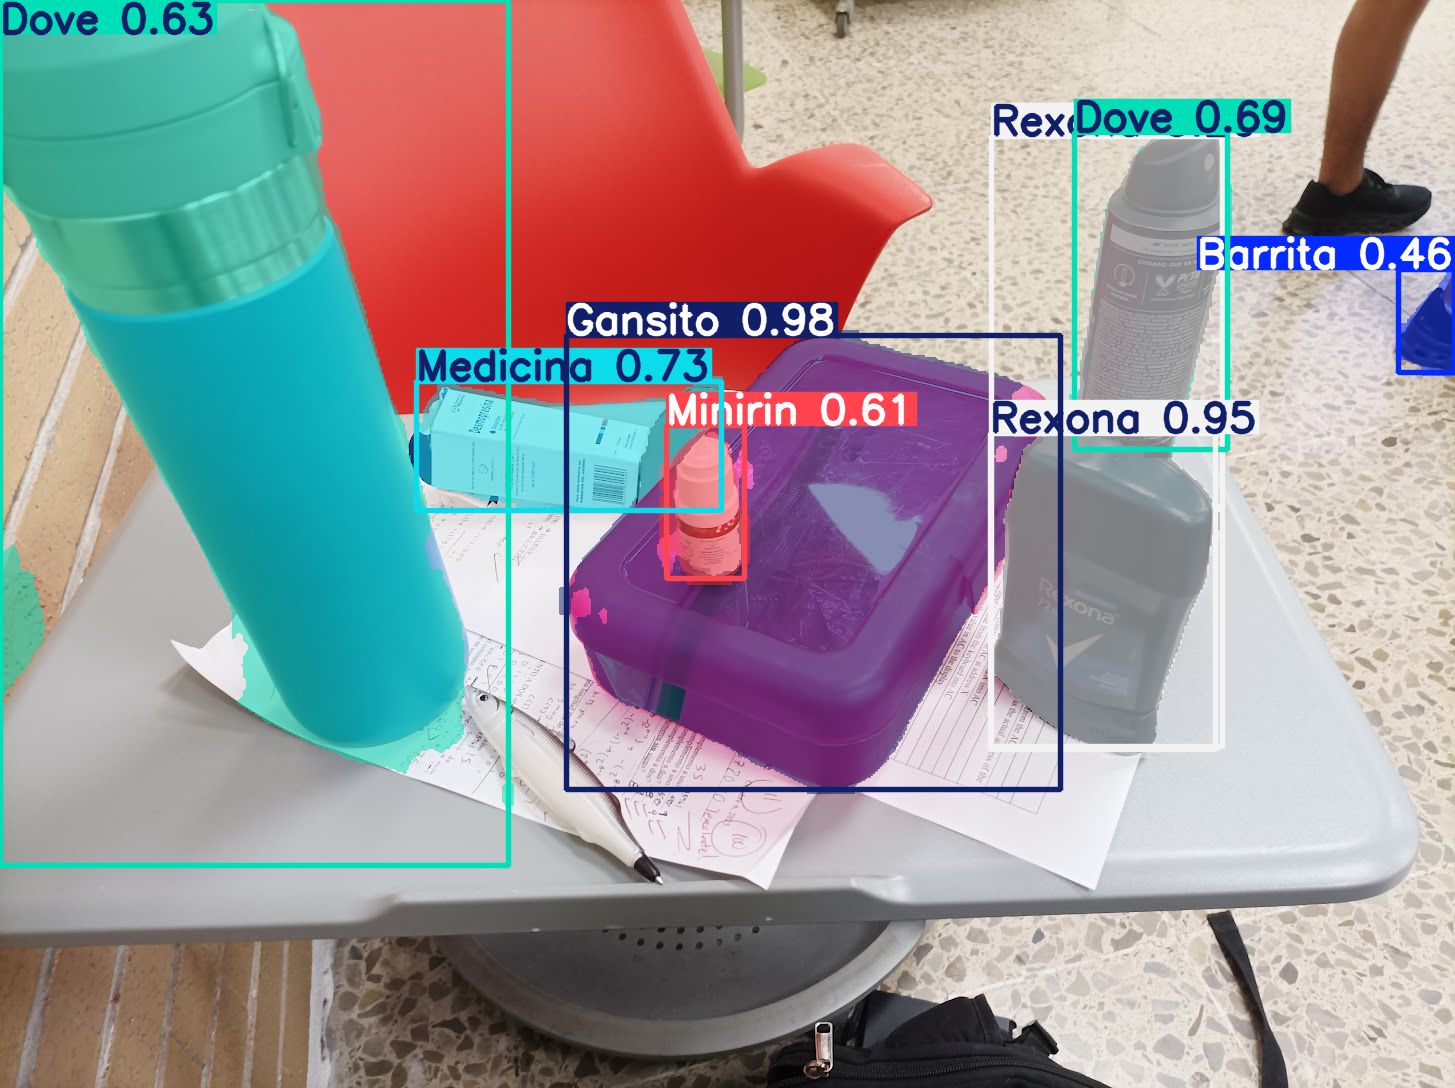

In [ ]:
pred = model('/content/prueba4.jpg')
pred[0].show()

pred.show()

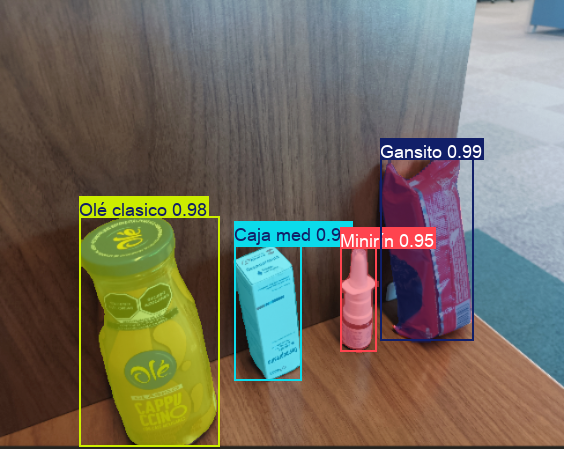

In [ ]:
pred[0].show()